# EGR 305/ECON 211 Engineering Systems Optimization and Economy
## Final Project Code
> Team: Adway, Chenglin, Yutong
> 
> Code Author: Chenglin
> 
> NetID: cz155
> 
> Date: 4th Dec., 2022

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Assume one QALY worths $100,000

# the inputs are 
# 1. willingness_(vaccine brand)_(which dose)
# 2. different_outcome_(age group): the percentage of people will have mild symptoms, be hospitalized, and be dead
# 3. (vaccine brand)_(age group)_transition_(which dose): the percentage of people will go to the less severe case if they were to get vaccinated
# 4. QALY_loss_(age group): the loss in QALY (based on how severe the outcome is)

# the output is
# QALY_(vaccine brand)_(age group)_(region)
# utility_QALY_(vaccine brand)_(age group)_(region)

population_A = [0.23, 0.57, 0.10, 0.07, 0.03]

QALY = 100000


# 0-19, 20-59, 60-69, 70-79, 80+
# based on the other regions' data

# here is the data for 5 age groups' people's willingness to get vaccinated (one dose, two dose (if applicable), not vaccinated)

willingness_pfizer_first_dose = np.array([0.05, 0.2, 0.08, 0.11, 0.15])
willingness_pfizer_second_dose = np.array([0.8, 0.6, 0.87, 0.8, 0.62])
willingness_pfizer_no_dose = 1 - willingness_pfizer_first_dose - willingness_pfizer_second_dose

# x = np.array([i for i in range(1, len(willingness_pfizer_first_dose) + 1)])
age_group = ['0-19', '20-59', '60-69', '70-79', '80+']

willingness_oxford_first_dose = []
willingness_oxford_second_dose = []

willingness_jenssen_first_dose = []

willingness_sinovac_first_dose = []
willingness_sinovac_second_dose = []

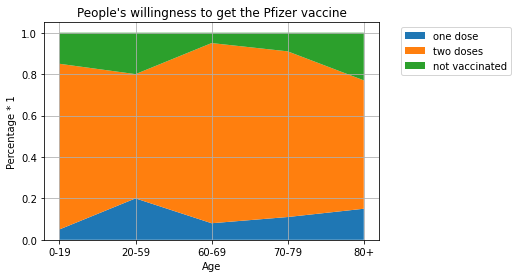

In [25]:
# visualize the willingness to get vaccinated for Pfizer

In [5]:
def utility_of_QALY(QALY):
    return np.sqrt(QALY)

In [6]:
def calculate_expectation(ageGroup_index, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose):
    if len(willingness_vaccineBrand_whichDose) == 3:
        result = \
        willingness_vaccineBrand_whichDose[0][ageGroup_index] * (different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + 
                                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + 
                                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[1][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[0][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[0][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[0][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][2]) * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[2][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[1][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[1][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[1][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][2]) * QALY_loss_ageGroup[2])
    else:
        result = \
        willingness_vaccineBrand_whichDose[0][ageGroup_index] * (different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + 
                                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + 
                                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[1][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[0][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[0][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[0][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][2]) * QALY_loss_ageGroup[2])
    if_not_vaccinated = different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + \
                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + \
                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]
    return utility_of_QALY(result), utility_of_QALY(if_not_vaccinated)

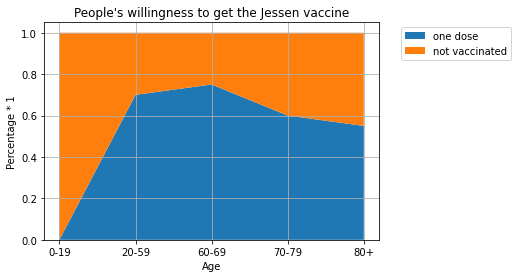

In [3]:
# Pfizer willingness

willingness_first_dose = np.array([0, 0.70, 0.75, 0.60, 0.55])
willingness_no_dose = 1 - willingness_first_dose
willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose]

plt.stackplot(age_group, willingness_first_dose, 
              willingness_no_dose, labels = ['one dose', 'not vaccinated'])
plt.xlabel('Age')
plt.ylabel('Percentage * 1')
plt.title("People's willingness to get the Jessen vaccine")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

In [7]:
# Pfizer 0-19

different_outcome_ageGroup = [0.99999, 0.000009, 0.000001] # children are less influenced by COVID
QALY_loss_ageGroup = [0.92, 0.75, 0]

# Pfizer seems to be more effective on children

MC = 10000
pfizer_0_19 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.2, 0.3, 0.4), np.random.triangular(0.5, 0.58, 0.65), np.random.triangular(0.993, 0.999, 1)]]

    this_pfizer_0_19, this_non_0_19 = calculate_expectation(0, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_0_19.append(this_pfizer_0_19)


100%|██████████| 10000/10000 [00:00<00:00, 146662.70it/s]


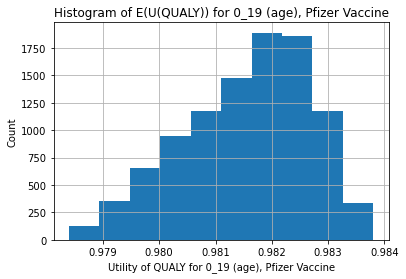

In [29]:
plt.hist(pfizer_0_19)
plt.xlabel('Utility of QUALY for 0_19 (age), Pfizer Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 0_19 (age), Pfizer Vaccine')
plt.grid()
plt.show()

In [67]:
print(this_non_0_19)
print(np.mean(pfizer_0_19))
QALY_gained_0_19 = QALY * (np.mean(pfizer_0_19) ** 2 - this_non_0_19 ** 2)
print(QALY_gained_0_19)

0.9591650275109076
0.9815517096804868
4344.620877668648


In [9]:
# Pfizer 20-59

willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose]
different_outcome_ageGroup = [0.9999, 0.00009, 0.00001]
QALY_loss_ageGroup = [0.95, 0.8, 0]

MC = 10000
pfizer_20_59 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.3, 0.4, 0.5), np.random.triangular(0.6, 0.68, 0.75), np.random.triangular(0.99, 0.995, 1)], 
                                                [np.random.triangular(0.5, 0.6, 0.7), np.random.triangular(0.9, 0.95, 1), np.random.triangular(0.999, 0.9999, 1)]]

    this_pfizer_20_59, this_non_20_59 = calculate_expectation(1, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_20_59.append(this_pfizer_20_59)


100%|██████████| 10000/10000 [00:00<00:00, 111006.24it/s]


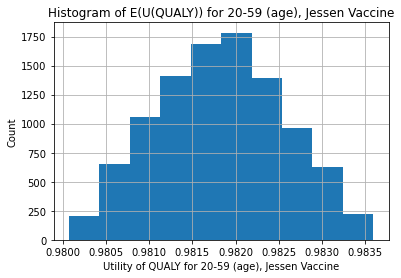

In [12]:
plt.hist(pfizer_20_59)
plt.xlabel('Utility of QUALY for 20-59 (age), Jessen Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 20-59 (age), Jessen Vaccine')
plt.grid()
plt.show()

In [66]:
print(this_non_20_59)
print(np.mean(pfizer_20_59))
QALY_gained_20_59 = QALY * (np.mean(pfizer_20_59) ** 2 - this_non_20_59 ** 2)
print(QALY_gained_20_59)

0.9746676356584331
0.9859023624380183
2202.6468260865518


In [13]:
# Pfizer 60-69

willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose]
different_outcome_ageGroup = [0.92, 0.0799, 0.0001]
QALY_loss_ageGroup = [0.82, 0.6, 0]

MC = 10000
pfizer_60_69 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.4, 0.5, 0.6), np.random.triangular(0.68, 0.78, 0.85), np.random.triangular(0.82, 0.89, 1)], 
                                                [np.random.triangular(0.6, 0.7, 0.8), np.random.triangular(0.84, 0.92, 1), np.random.triangular(0.86, 0.94, 1)]]

    this_pfizer_60_69, this_non_60_69 = calculate_expectation(2, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_60_69.append(this_pfizer_60_69)

NameError: name 'willingness_second_dose' is not defined

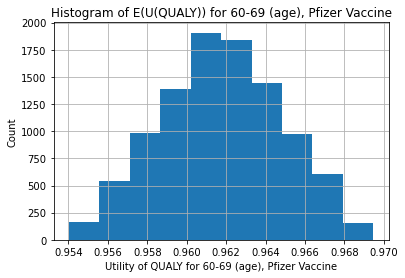

In [33]:
plt.hist(pfizer_60_69)
plt.xlabel('Utility of QUALY for 60-69 (age), Jessen Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 60-69 (age), Jessen Vaccine')
plt.grid()
plt.show()

In [65]:
print(this_non_60_69)
print(np.mean(pfizer_60_69))
QALY_gained_60_69 = QALY * (np.mean(pfizer_60_69) ** 2 - this_non_60_69 ** 2)
print(QALY_gained_60_69)

0.8957343356151979
0.9617756183636662
12267.234007881256


In [49]:
# Pfizer 70-79

willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose, willingness_second_dose]
different_outcome_ageGroup = [0.84, 0.159, 0.001]
QALY_loss_ageGroup = [0.76, 0.54, 0]

MC = 10000
pfizer_70_79 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.4, 0.5, 0.6), np.random.triangular(0.68, 0.78, 0.85), np.random.triangular(0.82, 0.89, 1)], 
                                                [np.random.triangular(0.7, 0.8, 0.9), np.random.triangular(0.84, 0.92, 1), np.random.triangular(0.89, 0.97, 1)]]

    this_pfizer_70_79, this_non_70_79 = calculate_expectation(3, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_70_79.append(this_pfizer_70_79)

100%|██████████| 10000/10000 [00:00<00:00, 96197.43it/s]


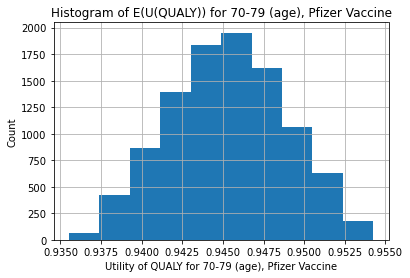

In [50]:
plt.hist(pfizer_70_79)
plt.xlabel('Utility of QUALY for 70-79 (age), Pfizer Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 70-79 (age), Pfizer Vaccine')
plt.grid()
plt.show()

In [63]:
print(this_non_70_79)
print(np.mean(pfizer_70_79))
QALY_gained_70_79 = QALY * (np.mean(pfizer_70_79) ** 2 - this_non_70_79 ** 2)
print(QALY_gained_70_79)

0.8510346643938776
0.9452831210628625
16930.017896634632


In [52]:
# Pfizer 80+

willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose, willingness_second_dose]
different_outcome_ageGroup = [0.75, 0.23, 0.02]
QALY_loss_ageGroup = [0.7, 0.4, 0]

MC = 10000
pfizer_80 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.4, 0.5, 0.6), np.random.triangular(0.68, 0.78, 0.85), np.random.triangular(0.82, 0.89, 1)], 
                                                [np.random.triangular(0.6, 0.7, 0.8), np.random.triangular(0.84, 0.92, 1), np.random.triangular(0.86, 0.94, 1)]]

    this_pfizer_80, this_non_80 = calculate_expectation(4, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_80.append(this_pfizer_80)

100%|██████████| 10000/10000 [00:00<00:00, 87895.71it/s]


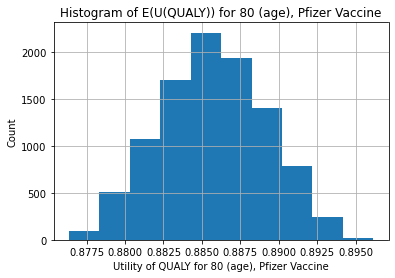

In [53]:
plt.hist(pfizer_80)
plt.xlabel('Utility of QUALY for 80 (age), Pfizer Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 80 (age), Pfizer Vaccine')
plt.grid()
plt.show()

In [64]:
print(this_non_80)
print(np.mean(pfizer_80))
QALY_gained_80 = QALY * (np.mean(pfizer_80) ** 2 - this_non_80 ** 2)
print(QALY_gained_80)

0.7854934754662192
0.885755264393034
16756.23883999736


Based on the analysis above, we know that the absolute gain for the elderly is higher than other age groups. Now, we want to calculate the implementation costs for the vaccine and see which one has the highest net expected return.

In [68]:
# The weighted unit gain of QALY in dollars

# if we consider the side effects here

side_effects = []
QALY_gain = [0, QALY_gained_20_59, QALY_gained_60_69, QALY_gained_70_79, QALY_gained_80]
weighted_QALY_gain = 0
for i in range(len(population_A)):
    weighted_QALY_gain += QALY_gain[i] * population_A[i]
print(weighted_QALY_gain)



4941.357488747043
